## Problem Statement
You are provided with a dataset containing various attributes of different wine samples. The goal of this assignment is to perform cluster analysis using the K-means algorithm to identify natural groupings in the data based on the attributes provided.

## Dataset Overview
The dataset consists of the following columns:
1. **Alcohol**: Alcohol content in the wine sample.
2. **Malic_Acid**: Amount of malic acid in the wine.
3. **Ash**: Ash content in the wine.
4. **Ash_Alcalinity**: Alkalinity of ash in the wine.
5. **Magnesium**: Magnesium content in the wine.
6. **Total_Phenols**: Total phenols content in the wine.
7. **Flavanoids**: Flavonoid content in the wine.
8. **Nonflavanoid_Phenols**: Non-flavonoid phenol content in the wine.
9. **Proanthocyanins**: Proanthocyanin content in the wine.
10. **Color_Intensity**: Intensity of the color of the wine.
11. **Hue**: Hue of the wine.
12. **OD280**: Ratio of OD280/OD315 of diluted wines.
13. **Proline**: Proline content in the wine.

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('WineData.csv')
df.head()

,Unnamed: 0,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Tasks

### Task 1: Data Preprocessing
- Handle any missing values if present.
- Scale the data using `StandardScaler` or `MinMaxScaler` since K-means is sensitive to the scale of features.
- Remove any unnecessary columns that don't contribute to clustering (e.g., index column if not relevant).

In [6]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

### Task 2: Determine the Optimal Number of Clusters
- Use the **Elbow method** to determine the optimal number of clusters.
- Visualize the results using a line plot of the **Within-Cluster Sum of Squares (WCSS)** against the number of clusters.



In [8]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Alcohol', 'Color_Intensity']])
    wcss.append(kmeans.inertia_)
wcss

[1067.9315729004506,
 418.1900236377047,
 203.8193758446264,
 144.36270188527567,
 107.26531502496516,
 98.53116040997807,
 82.34130896360463,
 66.02901939600831,
 67.22772565051,
 56.69111586444688]

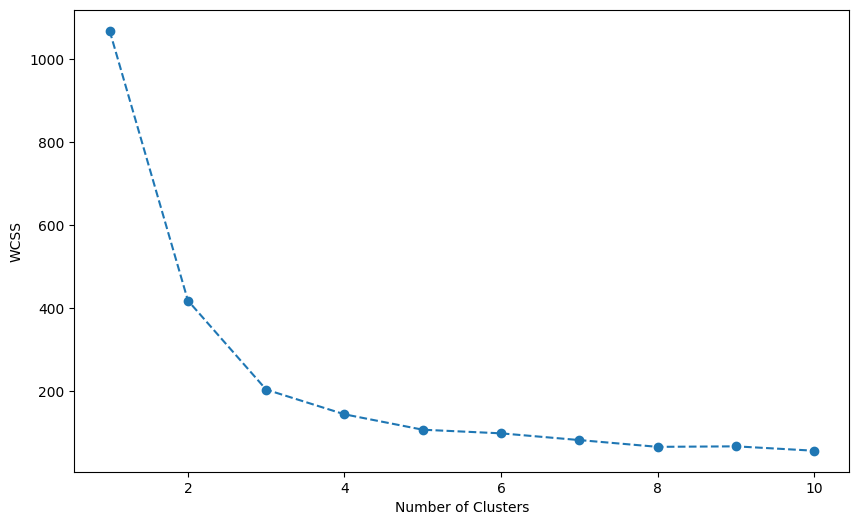

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

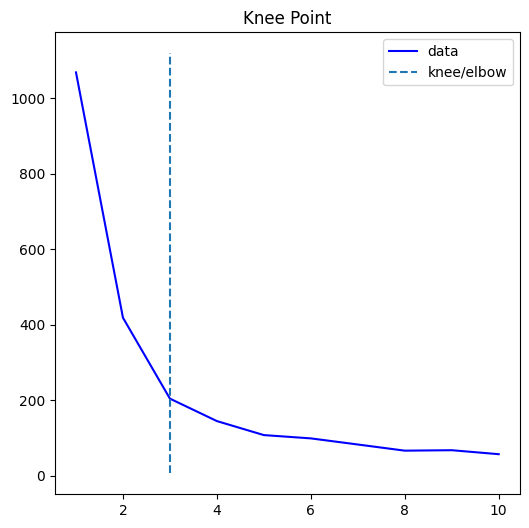

In [10]:
from kneed import KneeLocator
kne = KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing',)
kne.knee
kne.plot_knee()

### Task 3: K-means Clustering
- Apply K-means clustering using the optimal number of clusters obtained from the Elbow method.
- Assign cluster labels to each data point and create a new column in the dataset with these labels.



In [12]:
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(df[['Alcohol', 'Color_Intensity']])
df = df[['Alcohol', 'Color_Intensity', 'Cluster']]
df

,Alcohol,Color_Intensity,Cluster
0,14.23,5.64,1
1,13.20,4.38,1
2,13.16,5.68,1
3,14.37,7.80,0
4,13.24,4.32,1
...,...,...,...
173,13.71,7.70,0
174,13.40,7.30,0
175,13.27,10.20,0
176,13.17,9.30,0


### Task 4: Cluster Analysis
- Analyze the clusters by comparing the mean values of each feature within each cluster.
- Visualize the clusters using a pairplot or scatterplot for selected features to understand the separations visually.



In [13]:
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

           Alcohol  Color_Intensity
Cluster                            
0        13.384722         8.746111
1        13.451688         5.194416
2        12.253538         2.854000


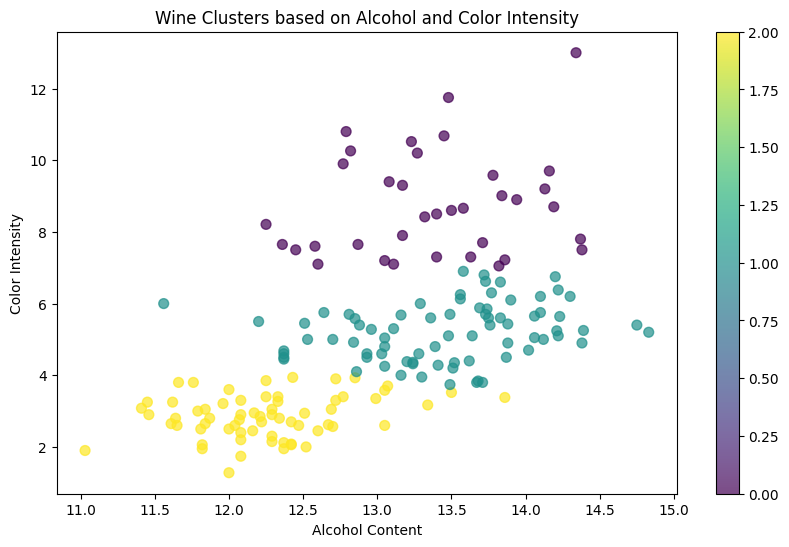

In [20]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Alcohol'], df['Color_Intensity'], c=df['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(scatter)
plt.xlabel('Alcohol Content')
plt.ylabel('Color Intensity')
plt.title('Wine Clusters based on Alcohol and Color Intensity')
plt.show()

### Task 5: Interpretation
- Interpret the characteristics of each cluster. For example, identify which cluster has the highest alcohol content, or which has the most intense color, etc.
- Suggest potential names or categories for each cluster based on the observed characteristics.


In [32]:
print("\nCluster Characteristics:")
for cluster in range(3):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\nCluster: {cluster}")
    print(f"Average Alcohol Content: {cluster_data['Alcohol'].mean(): .2f}")
    print(f"Average Color Intensity: {cluster_data['Color_Intensity'].mean(): .2f}")

    if cluster_data['Alcohol'].mean() > df['Alcohol'].mean():
        alc_desc = "High Alcohol"
    else:
        alc_desc = "Low Alcohol"
        
    if cluster_data['Color_Intensity'].mean() > df['Color_Intensity'].mean():
        color_desc = "Deep Color"
    else:
        color_desc = "Light Color" 
    print(f"Description: {alc_desc}, {color_desc}")


Cluster Characteristics:

Cluster: 0
Average Alcohol Content:  13.38
Average Color Intensity:  8.75
Description: High Alcohol, Deep Color

Cluster: 1
Average Alcohol Content:  13.45
Average Color Intensity:  5.19
Description: High Alcohol, Deep Color

Cluster: 2
Average Alcohol Content:  12.25
Average Color Intensity:  2.85
Description: Low Alcohol, Light Color
